In [1]:
import warnings
warnings.filterwarnings(
    action='ignore',
    category=FutureWarning
)

In [2]:
import os

import FACSPy as fp
import scanpy as sc

import figure_config as cfg

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.gridspec import GridSpec

from matplotlib.figure import Figure
from matplotlib.axes import Axes
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerBase

In [4]:
dataset = fp.read_dataset(file_name = os.path.join(cfg.data_input, "dataset_PBMC"))
dataset.uns["metadata"].dataframe["organ_diag_plot"] = [
    f"{diag}: {organ}" for organ, diag
    in zip(dataset.uns["metadata"].dataframe["organ"].tolist(), dataset.uns["metadata"].dataframe["diag_main"].tolist())
]
dataset

AnnData object with n_obs × n_vars = 1547949 × 28
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch', 'leiden', 'B_cells', 'NK_cells', 'CD8_T_cells', 'CD4_T_cells', 'Monocytes', 'PBMC_gated', 'NK_cells_gated', 'B_cells_gated', 'CD8_T_cells_gated', 'CD4_T_cells_gated', 'Monocytes_gated', 'organ_diag'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'gate_frequencies', 'mfi_sample_ID_compensated', 'mfi_sample_ID_transformed', 'fop_sample_ID_compensated', 'fop_sample_ID_transformed', 'settings', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'NK_cells_colors', 'CD8_T_cells_colors', 'CD4_T_cells_colors', 'Monocytes_colors'
    obsm: 'X_pca', 'X_umap', 'X_umap_CD45+_transformed', 'gating'
    varm: 'PCs'
    layers: 'compensated', 'raw', 'transformed'
    obsp: 'connectivities', 'distances'

In [5]:
nk_cells = fp.read_dataset(cfg.data_input, "dataset_NK_preprocessed")
nk_cells.uns["metadata"].dataframe["group"] = nk_cells.uns["metadata"].dataframe["diag_main"]

In [6]:
fp.settings.default_gate = "NK_cells"
fp.settings.default_layer = "transformed"
fp.tl.mfi(nk_cells)
fp.tl.pca_samplewise(nk_cells)

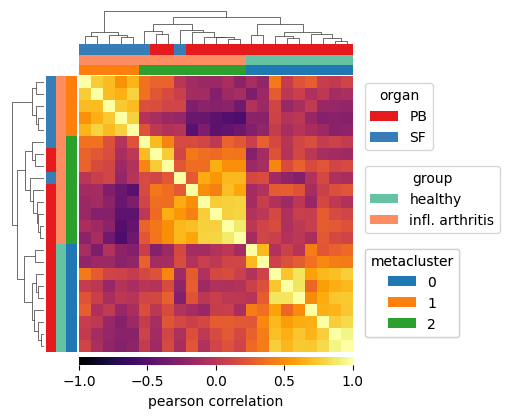

In [7]:
corr_heatmap = fp.pl.sample_correlation(nk_cells,
                                        metadata_annotation = ["organ", "group"],
                                        metaclusters = 3,
                                        corr_method = "pearson",
                                        label_metaclusters_in_dataset = True,
                                        label_metaclusters_key = "sample_corr_metaclusters",
                                        return_fig = True,
                                        save = f"sample_correlation.png")
corr_heatmap.savefig('corr_heatmap.png', bbox_inches = "tight", dpi = 300, transparent = True)
plt.show()
plt.close(corr_heatmap.fig)


In [8]:
def generate_subfigure_a(fig: Figure,
                         ax: Axes,
                         gs: GridSpec,
                         subfigure_label) -> None:
    ax.axis("off")
    cfg.figure_label(ax, subfigure_label, x = -0.3)
    ax.text(x = 0, y = 0.5, s = "Placeholder for\ngraphical abstract")
    return

In [9]:
def generate_subfigure_b(fig: Figure,
                         ax: Axes,
                         gs: GridSpec,
                         subfigure_label) -> None:
    ax.axis("off")
    cfg.figure_label(ax, subfigure_label, x = -0.12)
    fig_sgs = gs.subgridspec(1,4, wspace=0)

    nk_cells_freq = fig.add_subplot(fig_sgs[0])
    fp.pl.gate_frequency(
        dataset,
        gate = "NK_cells_gated",
        freq_of = "parent",
        ax = nk_cells_freq,
        show = False,
        groupby = "organ_diag_plot"
    )
    cfg._adjust_xlabels(nk_cells_freq)
    cfg._adjust_ylabels(nk_cells_freq)
    nk_cells_freq.set_title("NK cells\nfrequency", fontsize = cfg.TITLE_SIZE)
    nk_cells_freq.set_ylabel("freq. of PBMC", fontsize = cfg.AXIS_LABEL_SIZE)
    nk_cells_freq.tick_params(size = cfg.AXIS_LABEL_SIZE, pad = 0)

    cd8_cells_freq = fig.add_subplot(fig_sgs[1])
    fp.pl.gate_frequency(
        dataset,
        gate = "CD8_T_cells_gated",
        freq_of = "parent",
        ax = cd8_cells_freq,
        show = False,
        groupby = "organ_diag_plot"
    )
    cfg._adjust_xlabels(cd8_cells_freq)
    cfg._adjust_ylabels(cd8_cells_freq)
    cd8_cells_freq.set_title("CD8+ T cells\nfrequency", fontsize = cfg.TITLE_SIZE)
    cd8_cells_freq.set_ylabel("", fontsize = cfg.AXIS_LABEL_SIZE)
    cd8_cells_freq.tick_params(size = cfg.AXIS_LABEL_SIZE, pad = 0)

    cd4_cells_freq = fig.add_subplot(fig_sgs[2])
    fp.pl.gate_frequency(
        dataset,
        gate = "CD4_T_cells_gated",
        freq_of = "parent",
        ax = cd4_cells_freq,
        show = False,
        groupby = "organ_diag_plot"
    )
    cfg._adjust_xlabels(cd4_cells_freq)
    cfg._adjust_ylabels(cd4_cells_freq)
    cd4_cells_freq.set_title("CD4+ T cells\nfrequency", fontsize = cfg.TITLE_SIZE)
    cd4_cells_freq.set_ylabel("", fontsize = cfg.AXIS_LABEL_SIZE)
    cd4_cells_freq.tick_params(size = cfg.AXIS_LABEL_SIZE, pad = 0)

    monocytes_freq = fig.add_subplot(fig_sgs[3])
    fp.pl.gate_frequency(
        dataset,
        gate = "Monocytes_gated",
        freq_of = "parent",
        ax = monocytes_freq,
        show = False,
        groupby = "organ_diag_plot"
    )
    cfg._adjust_xlabels(monocytes_freq)
    cfg._adjust_ylabels(monocytes_freq)
    monocytes_freq.set_title("Monocytes\nfrequency", fontsize = cfg.TITLE_SIZE)
    monocytes_freq.set_ylabel("", fontsize = cfg.AXIS_LABEL_SIZE)
    monocytes_freq.tick_params(size = cfg.AXIS_LABEL_SIZE, pad = 0, length = 0, which = "both")
    return

In [10]:
def generate_subfigure_c(fig: Figure,
                         ax: Axes,
                         gs: GridSpec,
                         subfigure_label) -> None:
    ax.axis("off")
    cfg.figure_label(ax, subfigure_label, x = -0.23)
    fig_sgs = gs.subgridspec(1,1)

    corr_heatmap = fig.add_subplot(fig_sgs[0])
    corr_heatmap.imshow(matplotlib.image.imread("corr_heatmap.png"))
    corr_heatmap.axis("off")

    return

In [11]:
def generate_subfigure_d(fig: Figure,
                         ax: Axes,
                         gs: GridSpec,
                         subfigure_label) -> None:
    ax.axis("off")
    cfg.figure_label(ax, subfigure_label, x = -0.15)
    fig_sgs = gs.subgridspec(3,2)

    diag_main = fig.add_subplot(fig_sgs[0:2,0])
    spca_organ_diag = fp.pl.pca_samplewise(
        nk_cells,
        color = "organ_diag",
        cmap = "Set1",
        show = False,
        ax = diag_main,
        edgecolor = "black"
    )
    diag_main.set_title("organ and group", fontsize = cfg.TITLE_SIZE)
    handles, labels = diag_main.get_legend_handles_labels()
    diag_main.legend(handles,
                     ["healthy: PB",
                      "infl. arthr.: PB",
                      "infl. arthr.: SF"],
                     bbox_to_anchor = (0.5, -0.2),
                     loc = "upper center",
                     fontsize = cfg.AXIS_LABEL_SIZE)
    diag_main.set_xlabel(diag_main.get_xlabel(), fontsize = cfg.AXIS_LABEL_SIZE, labelpad = 0)
    diag_main.set_ylabel(diag_main.get_ylabel(), fontsize = cfg.AXIS_LABEL_SIZE, labelpad = 0)
    
    metaclusters = fig.add_subplot(fig_sgs[0:2,1])
    spca_mc = fp.pl.pca_samplewise(
        nk_cells,
        color = "sample_corr_metaclusters",
        cmap = "tab10",
        show = False,
        ax = metaclusters,
        edgecolor = "black"
    )
    
    metaclusters.set_title("metaclusters", fontsize = cfg.TITLE_SIZE)
    handles, labels = metaclusters.get_legend_handles_labels()
    metaclusters.legend(handles, labels, bbox_to_anchor = (0.5, -0.2), loc = "upper center", fontsize = cfg.AXIS_LABEL_SIZE, ncol = 1)
    metaclusters.set_xlabel(metaclusters.get_xlabel(), fontsize = cfg.AXIS_LABEL_SIZE, labelpad = 0)
    metaclusters.set_ylabel(metaclusters.get_ylabel(), fontsize = cfg.AXIS_LABEL_SIZE, labelpad = 0)

    return

In [12]:
def generate_subfigure_e(fig: Figure,
                         ax: Axes,
                         gs: GridSpec,
                         subfigure_label) -> None:
    ax.axis("off")
    cfg.figure_label(ax, subfigure_label, x = -0.1)
    fig_sgs = gs.subgridspec(1,2)

    comp1 = fig.add_subplot(fig_sgs[0,0])
    #comp2 = fig.add_subplot(fig_sgs[0,1])
    comp3 = fig.add_subplot(fig_sgs[0,1])
    
    comp1 = fig.add_subplot(
        fp.pl.fold_change(nk_cells,
                          layer = "compensated",
                          groupby = "organ_diag",
                          group1 = "PB_healthy", 
                          group2 = "PB_infl. arthritis",
                          comparison_label = " ",
                          group1_label = "healthy: PB",
                          group2_label = "infl. arthritis: PB",
                          ax = comp1,
                          show = False)
    )
    
#    comp2 = fig.add_subplot(
#        fp.pl.fold_change(nk_cells,
#                          layer = "compensated",
#                          groupby = "organ_diag",
#                          group1 = "PB_healthy", 
#                          group2 = "SF_infl. arthritis",
#                          comparison_label = " ",
#                          group1_label = "healthy: PB",
#                          group2_label = "infl. arthritis: SF",
#                          ax = comp2,
#                          show = False
#        )
#    )
    
    comp3 = fig.add_subplot(
        fp.pl.fold_change(nk_cells,
                          layer = "compensated",
                          groupby = "organ_diag",
                          group1 = "PB_infl. arthritis", 
                          group2 = "SF_infl. arthritis",
                          comparison_label = " ",
                          group1_label = "infl. arthritis: PB",
                          group2_label = "infl. arthritis: SF",
                          ax = comp3,
                          show = False
        )
    )
    cfg._adjust_ylabels(comp1)
    comp1.set_xticklabels(comp1.get_xticklabels(), fontsize = cfg.AXIS_LABEL_SIZE)
    comp1.set_xlabel("asinh fold change", fontsize = cfg.AXIS_LABEL_SIZE)
    comp1.set_ylabel("", fontsize = cfg.AXIS_LABEL_SIZE)
    comp1.tick_params(size = cfg.AXIS_LABEL_SIZE, pad = 0, length = 0, which = "both")
    comp1.set_title(comp1.get_title(), fontsize = cfg.TITLE_SIZE)
    comp1._colorbars[0].set_yticklabels(comp1._colorbars[0].get_yticklabels(), fontsize = cfg.AXIS_LABEL_SIZE)
    comp1._colorbars[0].set_ylabel("", fontsize = cfg.AXIS_LABEL_SIZE)
    
#    cfg._adjust_ylabels(comp2)
#    comp2.set_xticklabels(comp2.get_xticklabels(), fontsize = cfg.AXIS_LABEL_SIZE)
#    comp2.set_xlabel("asinh fold change", fontsize = cfg.AXIS_LABEL_SIZE)
#    comp2.set_ylabel("", fontsize = cfg.AXIS_LABEL_SIZE)
#    comp2.tick_params(size = cfg.AXIS_LABEL_SIZE, pad = 0, length = 0, which = "both")
#    comp2.set_title(comp2.get_title(), fontsize = cfg.TITLE_SIZE)
#    comp2._colorbars[0].set_yticklabels(comp2._colorbars[0].get_yticklabels(), fontsize = cfg.AXIS_LABEL_SIZE)
#    comp2._colorbars[0].set_ylabel("", fontsize = cfg.AXIS_LABEL_SIZE)
    
    cfg._adjust_ylabels(comp3)
    comp3.set_xticklabels(comp3.get_xticklabels(), fontsize = cfg.AXIS_LABEL_SIZE)
    comp3.set_xlabel("asinh fold change", fontsize = cfg.AXIS_LABEL_SIZE)
    comp3.set_ylabel("", fontsize = cfg.AXIS_LABEL_SIZE)
    comp3.tick_params(size = cfg.AXIS_LABEL_SIZE, length = 0, which = "both")
    comp3.set_title(comp3.get_title(), fontsize = cfg.TITLE_SIZE)
    comp3._colorbars[0].set_yticklabels(comp3._colorbars[0].get_yticklabels(), fontsize = cfg.AXIS_LABEL_SIZE)
    comp3._colorbars[0].set_ylabel("", fontsize = cfg.AXIS_LABEL_SIZE)
    return comp3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\tarik\RGBLab\Franca\NK_spectral_full\code\figure_config.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = AXIS_LABEL_SIZE)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\tarik\RGBLab\Franca\NK_spectral_full\code\figure_config.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = AXIS_LABEL_SIZE)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\tarik\RGBLab\Franca\NK_spectral_full\code\figure_config.py:32: UserWarning: FixedFor

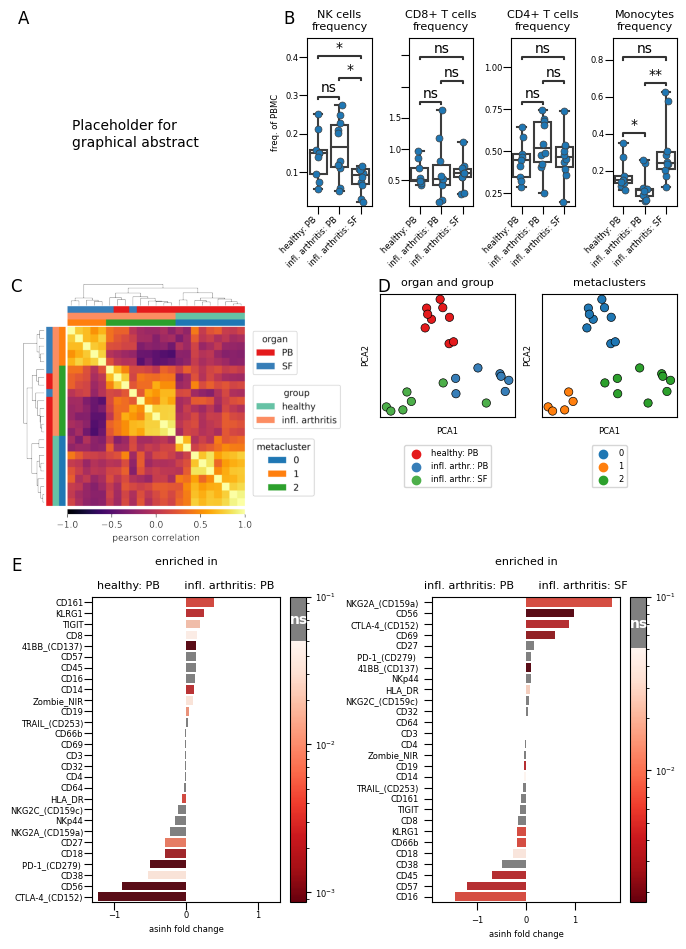

In [14]:
fig = plt.figure(layout = "constrained",
                 figsize = (cfg.FIGURE_WIDTH_FULL, cfg.FIGURE_HEIGHT_FULL))
gs = GridSpec(ncols = 8,
              nrows = 3,
              figure = fig,
              height_ratios = [1,1.05,1.5])
a_coords = gs[0,:3]
b_coords = gs[0,3:]
c_coords = gs[1,:4]
d_coords = gs[1,4:]
e_coords = gs[2,:]

fig_a = fig.add_subplot(a_coords)
fig_b = fig.add_subplot(b_coords)
fig_c = fig.add_subplot(c_coords)
fig_d = fig.add_subplot(d_coords)
fig_e = fig.add_subplot(e_coords)

generate_subfigure_a(fig, fig_a, a_coords, "A")
generate_subfigure_b(fig, fig_b, b_coords, "B")
generate_subfigure_c(fig, fig_c, c_coords, "C")
generate_subfigure_d(fig, fig_d, d_coords, "D")
generate_subfigure_e(fig, fig_e, e_coords, "E")

plt.savefig(os.path.join(cfg.figure_output, "Figure1.pdf"), dpi = 300, bbox_inches = "tight")
plt.show()